# Coco Data

http://cocodataset.org

Look at 2014 and 2017 data sets.

Only panoptic data for 2017.
Only dense pose data for 2014


In [1]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import tensorflow as tf
%matplotlib inline 

In [2]:
import logging
FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")

2018-11-09 11:54:13,412 DEBUG root : Logging enabled


In [3]:
import os
import sys
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
from coco_data import * 

In [4]:
coco_2014 = CocoData(COCO_DIR, "train", 2014)
coco_2017 = CocoData(COCO_DIR, "train", 2017)

loading annotations into memory...
Done (t=16.89s)
creating index...
Data set type is instances
index created!
No coco data exists at /data/AI/Data/coco/annotations/panoptic_train2014.json
loading annotations into memory...
Done (t=10.61s)
creating index...
Data set type is instances
index created!
loading annotations into memory...
Done (t=13.22s)
creating index...
Data set type is panoptic
index created!


In [5]:
images_2014 = coco_2014.load_images()
images_2017 = coco_2017.load_images()

2018-11-09 12:03:25,871 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:25,909 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:25,953 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:25,980 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:25,998 DEBUG matplotlib.axes._base : update_title_pos


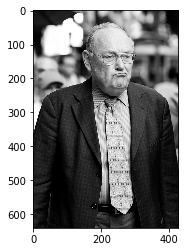

In [29]:
image_index = 2
image = images_2014.images[image_index]
plt.imshow(image.image_data.read_image())


2018-11-09 12:03:29,836 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:29,903 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:29,933 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:29,953 DEBUG matplotlib.axes._base : update_title_pos


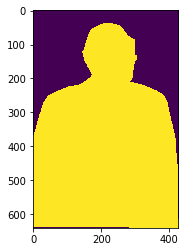

In [30]:
masks = image.load_masks()
for i in range(masks.shape[2]):
    if i == 0:
        plt.imshow(masks[:,:,i])
        plt.show()


In [31]:
coco_2017.panoptic.pano_anns[image.coco_image['id']]['segments_info'][0]


{'area': 172823,
 'bbox': [1, 37, 425, 603],
 'category_id': 1,
 'id': 3750201,
 'iscrowd': 0}

In [32]:
image2 = list([image2 for image2 in images_2017.images if image2.coco_image['id'] == image.coco_image['id']])[0]

In [33]:
anns = coco_2017.panoptic.pano_anns[image.coco_image['id']]

2018-11-09 12:03:44,309 DEBUG PIL.PngImagePlugin : STREAM b'IHDR' 16 13
2018-11-09 12:03:44,311 DEBUG PIL.PngImagePlugin : STREAM b'IDAT' 41 5453


2018-11-09 12:03:44,342 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:44,388 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:44,430 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:44,459 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 12:03:44,477 DEBUG matplotlib.axes._base : update_title_pos


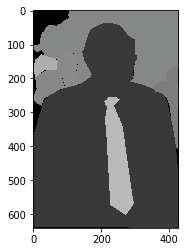

In [35]:
pano_image = image2.load_pano_image()
plt.imshow(pano_image)

2018-11-09 13:33:08,727 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:08,789 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:08,836 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:08,866 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:08,886 DEBUG matplotlib.axes._base : update_title_pos


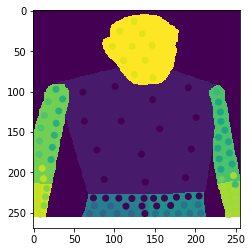

In [41]:
polys = image.people[0].dp_data.make_mask()
plt.imshow(polys)
plt.scatter(image.people[0].dp_data.dp_x, image.people[0].dp_data.dp_y, c=image.people[0].dp_data.dp_I)

2018-11-09 13:33:52,532 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:52,576 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:52,618 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:52,649 DEBUG matplotlib.axes._base : update_title_pos
2018-11-09 13:33:52,669 DEBUG matplotlib.axes._base : update_title_pos


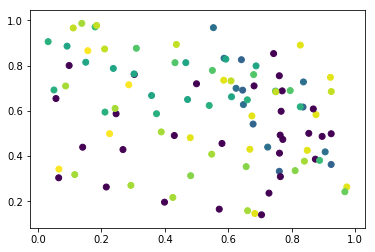

In [42]:
plt.scatter(image.people[0].dp_data.dp_U, image.people[0].dp_data.dp_V, c=image.people[0].dp_data.dp_I)

In [14]:
len(coco_2017.panoptic.pano_anns)

118287